## Prompting Techniques

Prompting techniques are methods used to guide AI models toward more accurate and desired outputs.

Common Techniques Include:
1. Zero-shot Learnings
2. Few-Shot Learnings
3. Chain-of-thoughts(step-by-step) promptings.

### Core prompting techniques

#### Zero-shot prompting: 
Asking the model to perform a task without providing any examples. The model relies solely on its pre-existing knowledge. 
#### Few-shot prompting: 
Providing the model with a few examples of the desired input-output format to guide its response. 
#### Chain-of-Thought (CoT) prompting: 
Instructing the model to break down a problem into smaller, sequential steps to arrive at a final answer, which improves its reasoning ability. 
#### Role prompting: 
Assigning a specific persona or role to the AI (e.g., "act as a historian") to influence its tone and perspective. 
#### Prompt chaining: 
Breaking a complex task into a sequence of simpler prompts, where the output of one prompt becomes the input for the next. 

In [1]:
from langchain import PromptTemplate
from langchain_core.prompts import ChatPromptTemplate

In [4]:
prompt = ChatPromptTemplate.from_messages(
    [
        ("system", "You are a helpful assistant that translates English to French."),
        ("user", "Translate the following English text to French: {text}"),
    ])
formated_prompt = prompt.format_messages(text="Hello, how are you?")
formated_prompt  # "Translate the following English text to French: Hello, how are you?"

[SystemMessage(content='You are a helpful assistant that translates English to French.', additional_kwargs={}, response_metadata={}),
 HumanMessage(content='Translate the following English text to French: Hello, how are you?', additional_kwargs={}, response_metadata={})]

In [6]:
# Few shot learning
few_shot_prompt = ChatPromptTemplate.from_messages(
    [
        ("system", "You are a helpful assistant that translates English to French."),
        ("user", "Translate the following English text to French: Hello, how are you?"),
        ("assistant", "Bonjour, comment ça va?"),
        ("user", "Translate the following English text to French: What is your name?"),
        ("assistant", "Comment tu t'appelles?"),
        ("user", "Translate the following English text to French: {text}"),
    ])
formated_few_shot_prompt = few_shot_prompt.format_messages(text="Where is the library?")
formated_few_shot_prompt  # "Translate the following English text to French: Where is the library?"

[SystemMessage(content='You are a helpful assistant that translates English to French.', additional_kwargs={}, response_metadata={}),
 HumanMessage(content='Translate the following English text to French: Hello, how are you?', additional_kwargs={}, response_metadata={}),
 AIMessage(content='Bonjour, comment ça va?', additional_kwargs={}, response_metadata={}),
 HumanMessage(content='Translate the following English text to French: What is your name?', additional_kwargs={}, response_metadata={}),
 AIMessage(content="Comment tu t'appelles?", additional_kwargs={}, response_metadata={}),
 HumanMessage(content='Translate the following English text to French: Where is the library?', additional_kwargs={}, response_metadata={})]

In [7]:
# Few shot leaarning Example 2
prompt = ChatPromptTemplate.from_messages(
    [
        ('system', ''' You are a very useful assistant. you are good at classifying Tweets into positive, Neutral and negative sentiments.
         Classify the tweets passed as input basis some of the examples passed.
         Here are some examples of how that classification could be done.
         Tweet: This is an amazing studio that you have | sentiment - Postive,
         Tweet: This product could be very well be sold for penny. Complete useless | sentiment - Negative, 
         Tweet: The weather has had not impact on the game so far | sentiment - Neutral
    '''),
    ('human', "{input}")
    ])
formated_prompt = prompt.format_messages(input="The movie was fantastic and I loved it!")
formated_prompt  # "The movie was fantastic and I loved it!"

[SystemMessage(content=' You are a very useful assistant. you are good at classifying Tweets into positive, Neutral and negative sentiments.\n         Classify the tweets passed as input basis some of the examples passed.\n         Here are some examples of how that classification could be done.\n         Tweet: This is an amazing studio that you have | sentiment - Postive,\n         Tweet: This product could be very well be sold for penny. Complete useless | sentiment - Negative, \n         Tweet: The weather has had not impact on the game so far | sentiment - Neutral\n    ', additional_kwargs={}, response_metadata={}),
 HumanMessage(content='The movie was fantastic and I loved it!', additional_kwargs={}, response_metadata={})]

![Screenshot 2025-10-30 at 12.04.33 PM.png](<attachment:Screenshot 2025-10-30 at 12.04.33 PM.png>)
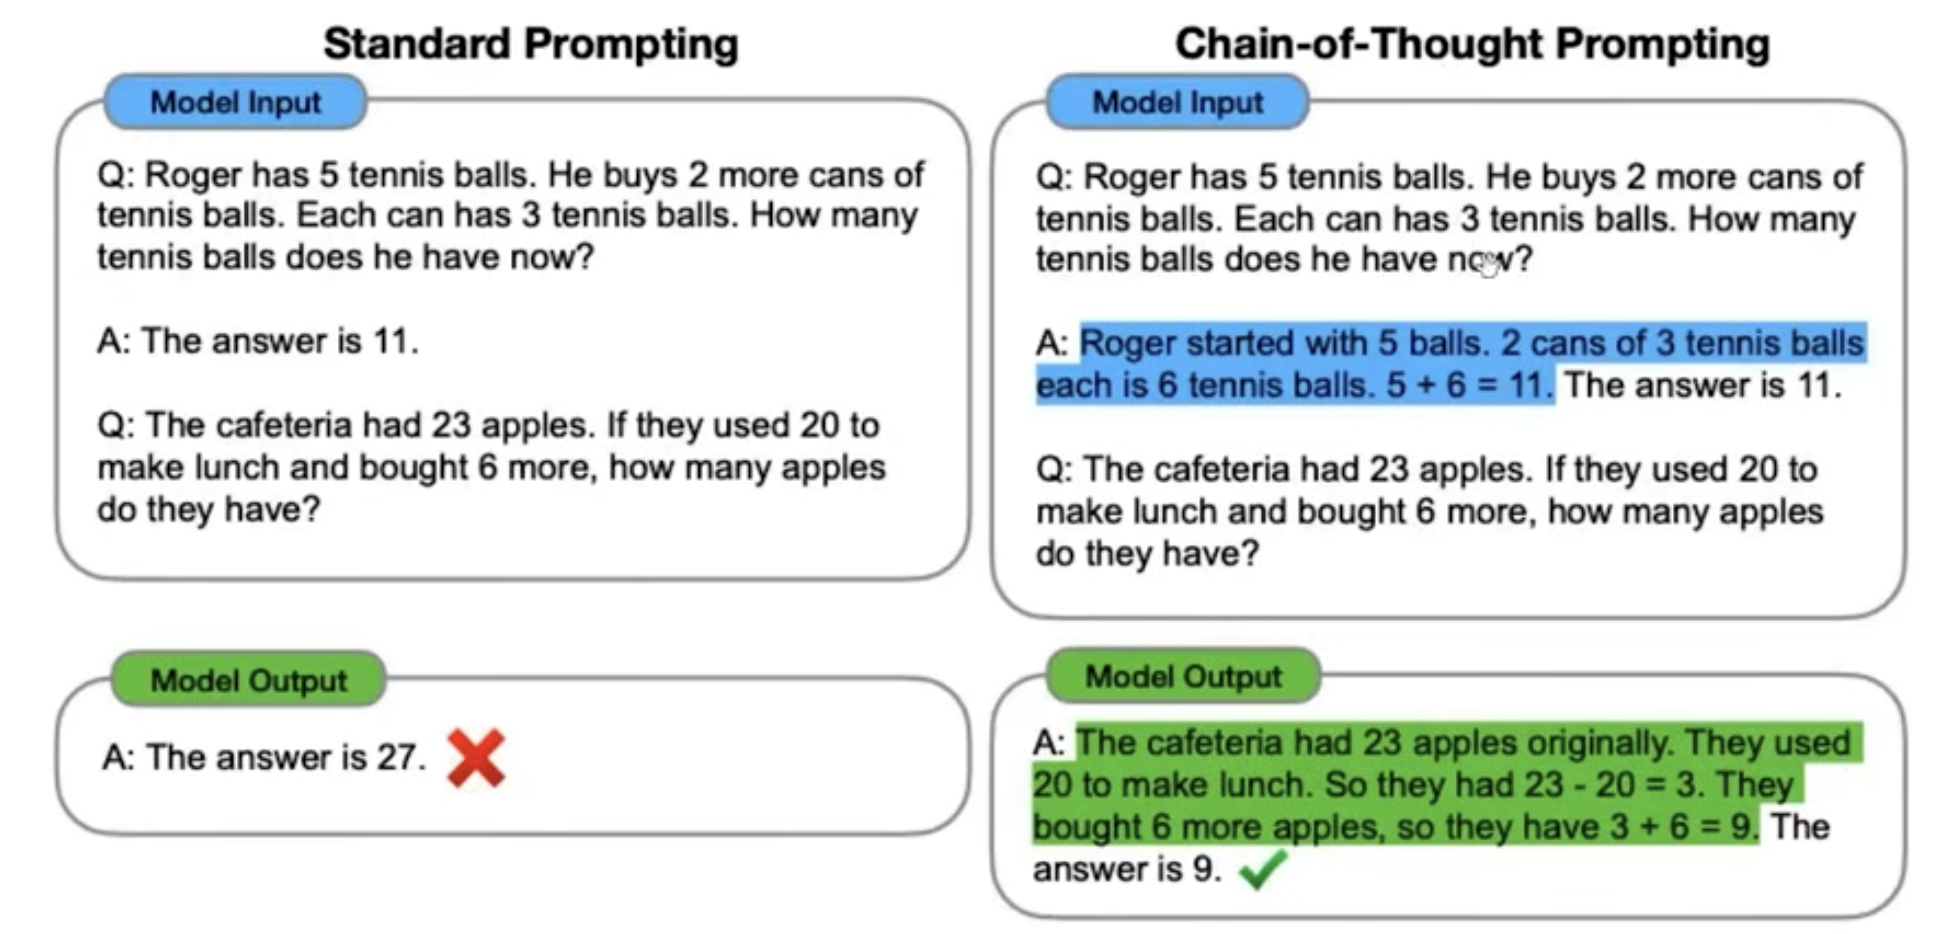
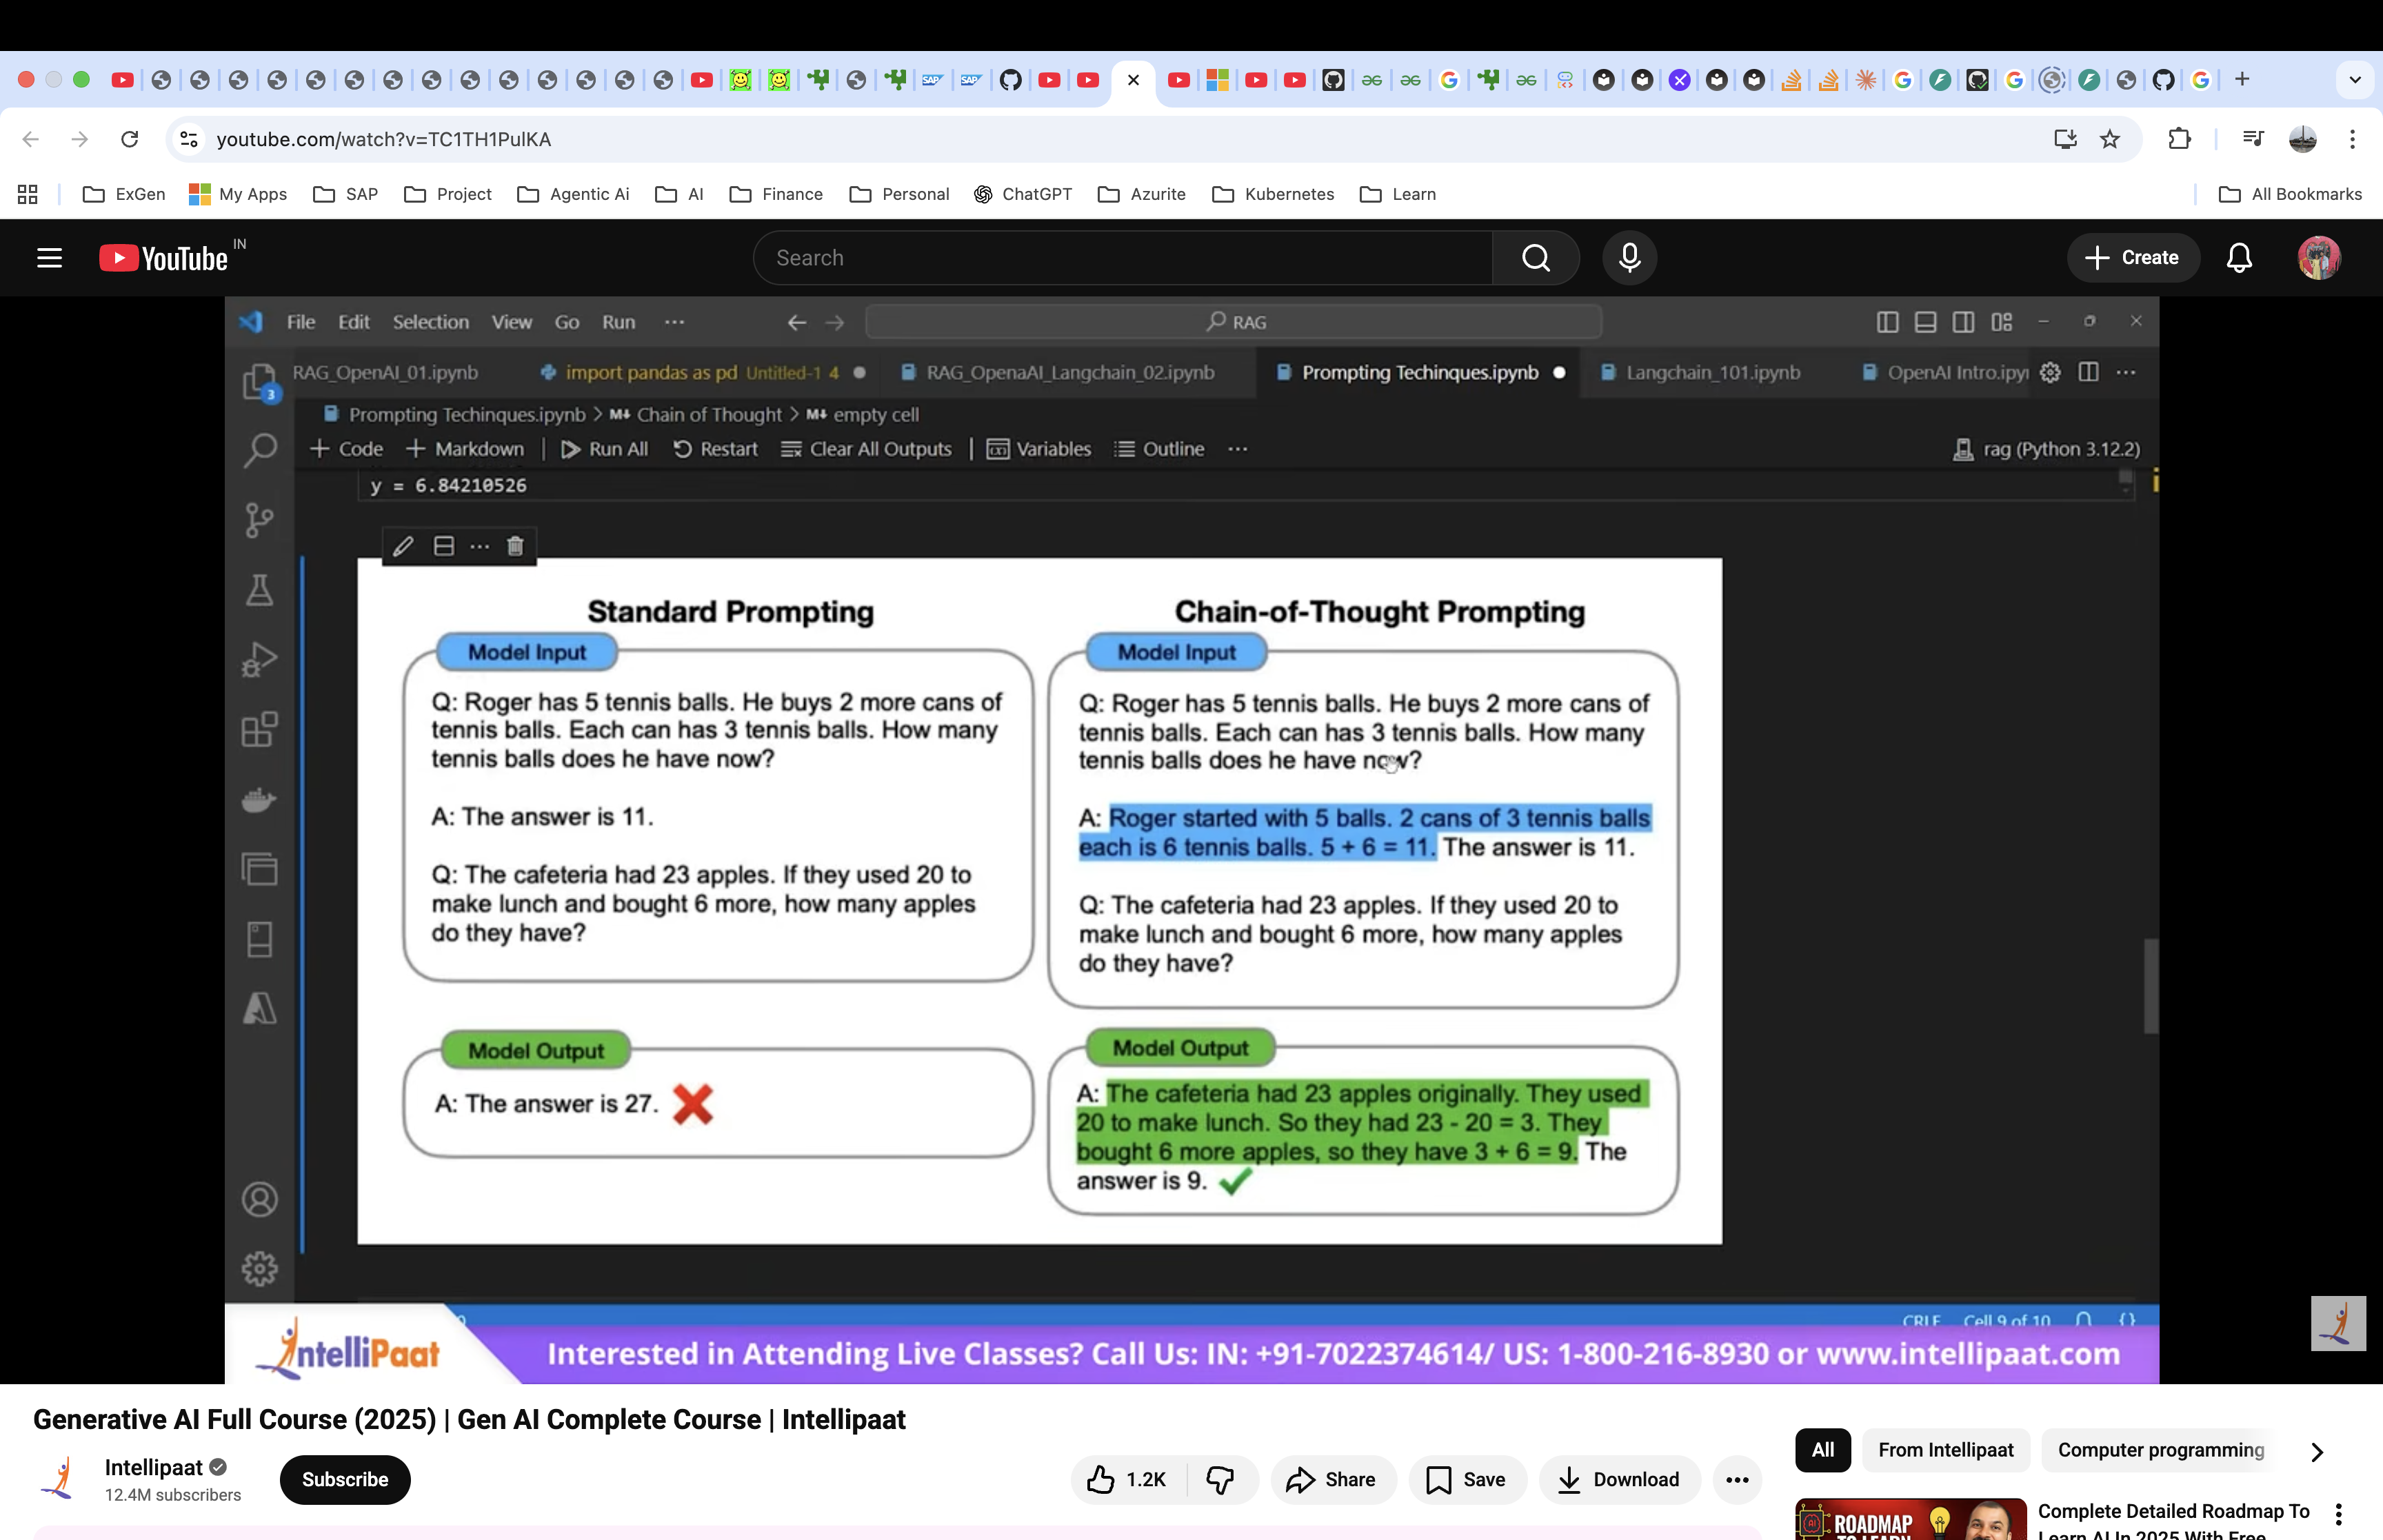

In [9]:
# Chain Of Thoughts Prompting
cot_prompt = ChatPromptTemplate.from_messages(
    [
        ('system', 'You are a very useful assistant. You are good at solving math word problems. '
                   'You always think step by step.'),
        ('human', '{question}')
    ])

formated_cot_prompt = cot_prompt.format_messages(question="If there are 3 cars and each car has 4 wheels, how many wheels are there in total?")
formated_cot_prompt

[SystemMessage(content='You are a very useful assistant. You are good at solving math word problems. You always think step by step.', additional_kwargs={}, response_metadata={}),
 HumanMessage(content='If there are 3 cars and each car has 4 wheels, how many wheels are there in total?', additional_kwargs={}, response_metadata={})]

In [10]:
cot_prompt = ChatPromptTemplate.from_messages(
    [
        ('system', ''' you are an assitant that is very good at solving math problems,
         Breakdown the problem into multiple substeps. Ensure each step is perfectly validated and response is appropriate.
         Only proceed to the next step once the previous step is complete. You can follow the following approach to solve a simultaneous equation

         Problem: Solve the following simultaneous equations:
         x + y = 10
         x-2y = 5
         Step 1: Multiply the first equation by 2 on both sides to have a common multiple of y
         Eq 1: 2x + 2y = 20
         Eq 2: x - 2y = 5

         Step 2: Add both equations to eliminate y
            3x = 25
            x = 8.33
         Step 3: Substitute the value of x in the first equation to get the value of y
            8.33 + y = 10
            y = 1.67
         Therefore, the solution to the simultaneous equations is x = 8.33 and y = 1.67
        '''),
        ('human', "{input}")
    ])
formated_cot_prompt = cot_prompt.format_messages(input="Solve the following simultaneous equations: 2x + 3y = 12 and x - y = 3")
formated_cot_prompt

[SystemMessage(content=' you are an assitant that is very good at solving math problems,\n         Breakdown the problem into multiple substeps. Ensure each step is perfectly validated and response is appropriate.\n         Only proceed to the next step once the previous step is complete. You can follow the following approach to solve a simultaneous equation\n\n         Problem: Solve the following simultaneous equations:\n         x + y = 10\n         x-2y = 5\n         Step 1: Multiply the first equation by 2 on both sides to have a common multiple of y\n         Eq 1: 2x + 2y = 20\n         Eq 2: x - 2y = 5\n\n         Step 2: Add both equations to eliminate y\n            3x = 25\n            x = 8.33\n         Step 3: Substitute the value of x in the first equation to get the value of y\n            8.33 + y = 10\n            y = 1.67\n         Therefore, the solution to the simultaneous equations is x = 8.33 and y = 1.67\n        ', additional_kwargs={}, response_metadata={}),
 H